In [1]:
%matplotlib inline
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In this exercise, we are interested to analyse the criteria for the government to approve funding, let's preprocess features in the dataset.

# Load SIE fund datasest
- Load 'sie_projects.csv' in data folder which contains projects funded by <b>Social Innovation and Entrepreneurship Development (SIE) Fund</b>, only the 18th and 21st columns are required

In [2]:
#load csv
df = pd.read_csv('data/sie_projects.csv', usecols=[18, 21])
df

,Major Beneficiaries,Brief Description
0,Elderly,The project aims to link up different stakehol...
1,People of diverse race,The project aims to helping Non-Chinese Speaki...
2,Low-income families,"With additional funding from the SIE Fund, SJS..."
3,Others,The Study examines the performance of the init...
4,Low-income families,The Project aims to enhance the efficiency and...
5,Others,The Study examines overall performance of the ...
6,Low-income families,The Hong Kong Council of Social Service (HKCSS...
7,Others,This project aims to empower impact intermedia...
8,Others,Having been funded by the SIE Fund since Septe...
9,Low-income families,Enhancing the capability of grassroots women a...


# Encode categorical data
- Perform one-hot encoding on the column 'Major Beneficiaries' (hint: use pd.get_dummies()), and concat the result to the original dataframe.

In [3]:
# one-hot encoding
df1 = pd.get_dummies(df['Major Beneficiaries'], prefix='Major Beneficiaries')
df = pd.concat([df, df1], axis=1)

# Encode text feature
- Perform TF-IDF on the column 'Brief Description', ignoring stopwords defined by the NLTK library

In [4]:
# import en stopwords from nltk
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')
print(en_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
# convert text in Brief Description to a list called corpus
corpus = df['Brief Description'].tolist()
corpus[:3]

['The project aims to link up different stakeholders on the supply and demand sides and enhance synergy by way of engagement, cross-sector partnership and collaboration. The Gerontechnology Platform will comprise four basic functionalities, namely (1) a knowledge hub; (2) network and capacity building; (3) consultancy, localisation and testing support; and (4) impact assessment, with a view to enhancing the quality of life, independence and self-reliance of the elderly as well as providing support to their families, caregivers, healthcare staff and institutions.\xa0',
 'The project aims to helping Non-Chinese Speaking (NCS) kindergarten students improve their Chinese proficiency and learning motivation, enhancing kindergarten teachers’ capability of teaching NCS students Chinese, and thereby relieving the poverty and social exclusion issues of NCS students in the long run.  ',
 'With additional funding from the SIE Fund, SJS launched the second phase of the project "FOOD-CO 2.0" to fur

- Using sklearn TfidfVectorizer, fit and transform corpus to a sparse matrix named X.

In [6]:
# transfer corpus to tfidf vectors (sparse matrix)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=en_stopwords)
X = vectorizer.fit_transform(corpus)

- Create a new dataframe df1 which columns are feature names of tf-idf vectorizer and data is the dense array of X.

In [7]:
# store tf-idf in df1
# concat the result to the original dataframe
df1 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df = pd.concat([df, df1], axis=1)
df.head()

,Major Beneficiaries,Brief Description,Major Beneficiaries_Children and youth,Major Beneficiaries_Elderly,Major Beneficiaries_Low-income families,Major Beneficiaries_Others,Major Beneficiaries_People of diverse race,Major Beneficiaries_Persons with disabilities,100,14,...,world,wrist,wristbands,writing,written,year,young,youngsters,youth,youths
0,Elderly,The project aims to link up different stakehol...,0,1,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,People of diverse race,The project aims to helping Non-Chinese Speaki...,0,0,0,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Low-income families,"With additional funding from the SIE Fund, SJS...",0,0,1,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Others,The Study examines the performance of the init...,0,0,0,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Low-income families,The Project aims to enhance the efficiency and...,0,0,1,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Word Cloud
- A word cloud is <b>a collection of words with sizes that are proportional to their occurrences in a corpus</b>.
- We are going use tf-idf calculated for each word in the corpus to draw a word cloud to visualize the most popular project topics for SIE fund.
- Using Image class of library PIL open 1_mask.png and convert the image to greyscale using convert('L').
- An example of PIL Image can be found <a href='https://www.geeksforgeeks.org/python-pil-image-convert-method/'>here</a>. 
- Convert the loaded image to numpy array using np.array() and store it in a variable named 'mask'.

In [8]:
# load mask of word cloud
from PIL import Image
mask = np.array(Image.open("img/1_mask.png").convert('L'))

- Calculate the mean of tf-idf of each word (i.e. mean importance of each word in all documents) over all documents using df1, convert the result to a dictionary with words as keys and frequencies as values, name the dictionary 'frequencies'.

In [9]:
# frequency dictionary of words in corpus
frequencies = df1.mean().to_dict()
frequencies

{'100': 0.000563831622647321,
 '14': 0.0006348333029158136,
 '15': 0.000385297512240945,
 '19': 0.0004807864143647962,
 '200': 0.0006489654539701741,
 '2015': 0.0006552469039044841,
 '2016': 0.0004313967212280288,
 '2017': 0.0018387874648736475,
 '2018': 0.0003794959209464357,
 '2019': 0.0013621405369981766,
 '2020': 0.0013808939129113702,
 '2023': 0.00044471918949368804,
 '3d': 0.002798621256720726,
 '41': 0.0006961467990791807,
 '45': 0.0010077635012429684,
 '55': 0.0009059377131275274,
 '70': 0.0009059377131275274,
 'abilities': 0.0015601981000423972,
 'ability': 0.0032687207573590614,
 'able': 0.001013450862069211,
 'academics': 0.0003794959209464357,
 'access': 0.0029383739426096177,
 'accessibility': 0.0007400641183206145,
 'accessible': 0.0007327151162141336,
 'accident': 0.0010137984347988356,
 'accompanying': 0.001116074219377751,
 'accurate': 0.000563831622647321,
 'achieve': 0.0013461089543711556,
 'achieving': 0.00044471918949368804,
 'acquire': 0.001244181167244349,
 'acqu

- Using the library wordcloud and mask prepared above, create a wordcloud graphic and see what are the most frequent words in project descriptions.
- An example can be found <a href='https://github.com/amueller/word_cloud/blob/master/examples/simple.py'>here</a>.

In [10]:
# install wordcloud
#!pip install wordcloud

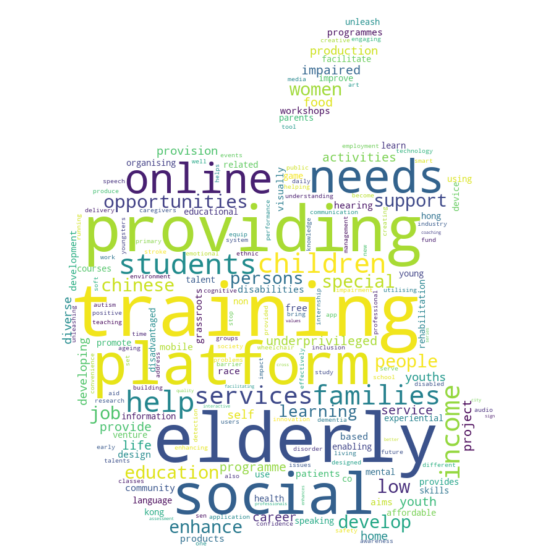

In [11]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white', mask=mask).generate_from_frequencies(frequencies)
fig, ax = plt.subplots(figsize=(10 ,10))
ax.imshow(wc, interpolation="bilinear");
ax.axis("off");